# LATIHAN

In [2]:
# get datasets
from sklearn.datasets import make_blobs

# create dataset
X, y = make_blobs(
        n_samples=300, n_features=2,
        centers=4, cluster_std=0.60,
        random_state=0)

In [3]:
import matplotlib.pyplot as plt

# visualize data
plt.scatter(
    X[:, 0], X[:, 1],
    c='yellow', marker='o',
    edgecolor='red', s=50)

plt.show()

<Figure size 640x480 with 1 Axes>

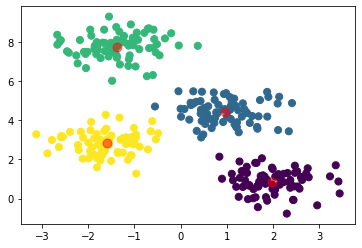

In [4]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

centers = kmeans.cluster_centers_

plt.scatter(
    X[:, 0], X[:, 1],
    c=y_kmeans, s=50,
    cmap='viridis')

plt.scatter(
    centers[:, 0], centers[:, 1],
    c='red', s=80,
    alpha=0.5)


label :  [1 1 1 0 0 2]
prediksi lokasi data input [0, 0] dan [12, 3]: 
 [1 0]
lokasi centroids: 
 [[10.  3.]
 [ 1.  2.]
 [10.  0.]]


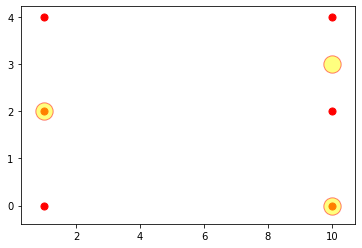

In [5]:
from sklearn.cluster import KMeans
import numpy as np

X = np.array(
    [
        [1, 2], [1, 4], [1, 0],
        [10, 2], [10, 4], [10, 0]
    ]
)

kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
print("label : ", kmeans.labels_)
print("prediksi lokasi data input [0, 0] dan [12, 3]: \n",
      kmeans.predict([[0, 0], [12, 3]]))
print("lokasi centroids: \n",
     kmeans.cluster_centers_)

centers = kmeans.cluster_centers_
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c='red', s=50);
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', edgecolor='red', s=300, alpha=0.5);

In [1]:
from sklearn import metrics
from sklearn.preprocessing import scale
from sklearn import datasets

digits = datasets.load_digits()
X = scale(digits.data)
labels = digits.target
kmeans_digits = KMeans(n_clusters=10, n_init=10)
kmeans_digits.fit(X)

print("Silhouette Score: ",
     metrics.silhouette_score(digits.data, kmeans_digits.labels_, metric='euclidean', sample_size=300)
     )

print("V Measure Score: ",
     metrics.v_measure_score(labels, kmeans_digits.labels_)
     )

NameError: name 'KMeans' is not defined

C:\Users\Dimas\Anaconda3\lib\site-packages\sklearn\manifold\spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


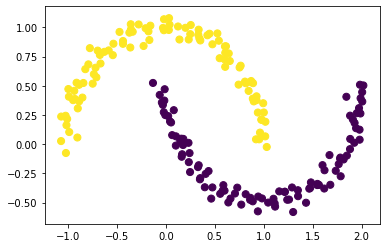

In [7]:
from sklearn.datasets import make_moons
from sklearn.cluster import SpectralClustering

moon_X, moon_y = make_moons(200, noise=0.05, random_state=0)

model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans')
labels = model.fit_predict(moon_X)
plt.scatter(moon_X[:, 0], moon_X[:, 1], c=labels, s=50, cmap='viridis')

# TUGAS PRAKTIKUM

In [2]:
# NOMOR 1
import pandas as pd

columns = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'G1', 'G2', 'G3']
gradeData = pd.read_csv('student-mat.csv', usecols=columns)

In [3]:
gradeData.head(12)

,age,Medu,Fedu,traveltime,studytime,G1,G2,G3
0,18,4,4,2,2,5,6,6
1,17,1,1,1,2,5,5,6
2,15,1,1,1,2,7,8,10
3,15,4,2,1,3,15,14,15
4,16,3,3,1,2,6,10,10
5,16,4,3,1,2,15,15,15
6,16,2,2,1,2,12,12,11
7,17,4,4,2,2,6,5,6
8,15,3,2,1,2,16,18,19
9,15,3,4,1,2,14,15,15


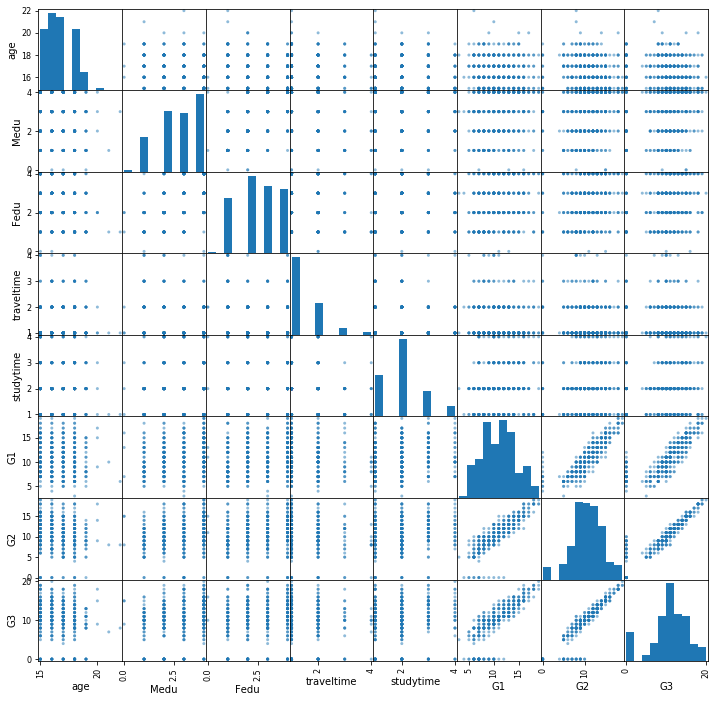

In [12]:
# NOMOR 2
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

scatter_matrix(gradeData, figsize=(12,12))
plt.show()

In [13]:
print(gradeData.corr(method='pearson'))

                 age      Medu      Fedu  traveltime  studytime        G1  \
age         1.000000 -0.163658 -0.163438    0.070641  -0.004140 -0.064081   
Medu       -0.163658  1.000000  0.623455   -0.171639   0.064944  0.205341   
Fedu       -0.163438  0.623455  1.000000   -0.158194  -0.009175  0.190270   
traveltime  0.070641 -0.171639 -0.158194    1.000000  -0.100909 -0.093040   
studytime  -0.004140  0.064944 -0.009175   -0.100909   1.000000  0.160612   
G1         -0.064081  0.205341  0.190270   -0.093040   0.160612  1.000000   
G2         -0.143474  0.215527  0.164893   -0.153198   0.135880  0.852118   
G3         -0.161579  0.217147  0.152457   -0.117142   0.097820  0.801468   

                  G2        G3  
age        -0.143474 -0.161579  
Medu        0.215527  0.217147  
Fedu        0.164893  0.152457  
traveltime -0.153198 -0.117142  
studytime   0.135880  0.097820  
G1          0.852118  0.801468  
G2          1.000000  0.904868  
G3          0.904868  1.000000  


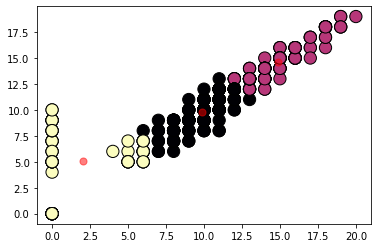

In [35]:
# NOMOR 3
from sklearn.cluster import KMeans
import numpy as np

X = np.array(gradeData[['G3', 'G2']])

kmeans = KMeans(n_clusters=3, init='k-means++')
kmeans.fit(X)

centroid = kmeans.cluster_centers_
y_kmeans = kmeans.predict(X)

plt.scatter(
    X[:, 0], X[:, 1],
    c=y_kmeans, s=150,
    edgecolor='black', cmap='magma')

plt.scatter(
    centroid[:, 0], centroid[:, 1],
    c='red', s=50,
    alpha=0.5)

In [27]:
from sklearn import metrics

silhouetteScore = metrics.silhouette_score(X, y_kmeans, metric='euclidean', sample_size=300)

print("Silhouette Score: ", silhouetteScore)

Silhouette Score:  0.5486565446127786


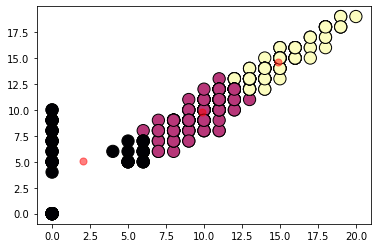

In [34]:
from sklearn.cluster import KMeans
import numpy as np

X = np.array(gradeData[['G3', 'G2']])

kmeansRandom = kmeans = KMeans(n_clusters=3, init='random')
kmeansRandom.fit(X)

centroidRandom = kmeansRandom.cluster_centers_
y_kmeansRandom = kmeansRandom.predict(X)

plt.scatter(
    X[:, 0], X[:, 1],
    c=y_kmeansRandom, s=150,
    edgecolor='black', cmap='magma')

plt.scatter(
    centroidRandom[:, 0], centroidRandom[:, 1],
    c='red', s=50,
    alpha=0.5)